In [1]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy as sp

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
#from graphs import *

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

subfolder = "data"
os.listdir(subfolder)

['CONTENT_CATEGORY.zip',
 'CONTENT_CATEGORY_BOTTOM.zip',
 'CONTENT_CATEGORY_TOP.zip',
 'conversiones.zip',
 'data.zip',
 'data2.zip',
 'device_data.zip',
 'PAGE.zip',
 'pageviews.zip',
 'pageviews_complemento.zip',
 'pageview_with_previous',
 'pageview_with_previous_2',
 'pageview_with_previous_2.csv',
 'sampleSubmission.zip',
 'SITE_ID.zip']

### >> Load data

In [3]:
col_user = 'USER_ID'
data = pd.read_csv(
    "{}/pageviews.zip".format(subfolder), parse_dates=["FEC_EVENT"], dtype=str
).sort_values(
    [col_user, "FEC_EVENT"]
)
data.shape

(17936934, 8)

In [4]:
comp = pd.read_csv(
    "{}/pageviews_complemento.zip".format(subfolder), parse_dates=["FEC_EVENT"], dtype=str
).sort_values(
    [col_user, "FEC_EVENT"]
)
comp.shape

(4933420, 8)

In [5]:
data.head()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID
284,2018-01-01 09:56:47,14,4,2,4,2,1,0
285,2018-01-01 09:57:19,14,4,2,4,2,1,0
286,2018-01-01 09:57:48,12,4,2,4,2,1,0
287,2018-01-01 09:57:48,10,4,2,4,2,1,0
288,2018-01-01 09:57:49,11,4,2,4,2,1,0


In [6]:
comp.head()

,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID,FEC_EVENT
3136070,2,2,2,2,2,1,10000,2018-07-10 19:14:34
3136071,99,2,2,2,3,1,10000,2018-07-10 19:14:47
3136072,2,2,2,2,2,1,10000,2018-07-10 19:14:50
3136073,2,2,2,2,2,1,10000,2018-07-10 19:15:05
3136074,3,2,2,2,3,1,10000,2018-07-10 19:15:26


In [7]:
data['FEC_EVENT'].min(), data['FEC_EVENT'].max()

(Timestamp('2018-01-01 00:09:17'), Timestamp('2018-12-31 23:59:59'))

In [8]:
comp['FEC_EVENT'].min(), comp['FEC_EVENT'].max()

(Timestamp('2018-07-01 00:01:07'), Timestamp('2018-10-31 23:59:57'))

### >> Review unicidad

In [9]:
for col in data.columns:
    print(col, data[col].unique().shape)

print("/"*100)

for col in comp.columns:
    print(col, comp[col].unique().shape)

FEC_EVENT (10496454,)
PAGE (1725,)
CONTENT_CATEGORY (65,)
CONTENT_CATEGORY_TOP (13,)
CONTENT_CATEGORY_BOTTOM (65,)
SITE_ID (4,)
ON_SITE_SEARCH_TERM (294,)
USER_ID (11676,)
////////////////////////////////////////////////////////////////////////////////////////////////////
PAGE (1233,)
CONTENT_CATEGORY (59,)
CONTENT_CATEGORY_TOP (11,)
CONTENT_CATEGORY_BOTTOM (59,)
SITE_ID (4,)
ON_SITE_SEARCH_TERM (1,)
USER_ID (6661,)
FEC_EVENT (3209918,)


In [10]:
order_columns = list(data.columns)
order_columns

['FEC_EVENT',
 'PAGE',
 'CONTENT_CATEGORY',
 'CONTENT_CATEGORY_TOP',
 'CONTENT_CATEGORY_BOTTOM',
 'SITE_ID',
 'ON_SITE_SEARCH_TERM',
 'USER_ID']

### >> Union data

In [11]:
data = pd.concat(
    [data[order_columns], comp[order_columns]], axis=0
)
del comp
print(data.shape)

data.head()

(22870354, 8)


,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID
284,2018-01-01 09:56:47,14,4,2,4,2,1,0
285,2018-01-01 09:57:19,14,4,2,4,2,1,0
286,2018-01-01 09:57:48,12,4,2,4,2,1,0
287,2018-01-01 09:57:48,10,4,2,4,2,1,0
288,2018-01-01 09:57:49,11,4,2,4,2,1,0


In [12]:
gc.collect()

66

In [13]:
%%time
serie_count = data.groupby(
    by=[col_user]
)['FEC_EVENT'].count()

display(serie_count[serie_count <= 3])

USER_ID
11084    3
11317    3
11445    2
11538    3
11674    2
Name: FEC_EVENT, dtype: int64

Wall time: 4.17 s


In [14]:
display(data.dtypes)

FEC_EVENT                  datetime64[ns]
PAGE                               object
CONTENT_CATEGORY                   object
CONTENT_CATEGORY_TOP               object
CONTENT_CATEGORY_BOTTOM            object
SITE_ID                            object
ON_SITE_SEARCH_TERM                object
USER_ID                            object
dtype: object

In [15]:
for col in data.columns:
    print(col, data[col].unique().shape)

FEC_EVENT (12397072,)
PAGE (1733,)
CONTENT_CATEGORY (65,)
CONTENT_CATEGORY_TOP (13,)
CONTENT_CATEGORY_BOTTOM (65,)
SITE_ID (4,)
ON_SITE_SEARCH_TERM (294,)
USER_ID (11676,)


<AxesSubplot:>

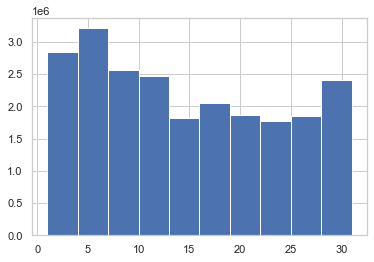

In [16]:
data['FEC_EVENT'].dt.day.hist()

<AxesSubplot:>

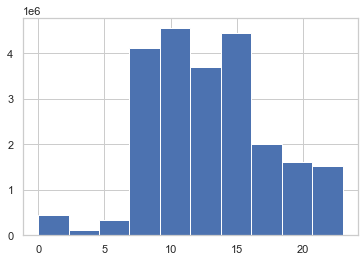

In [17]:
data['FEC_EVENT'].dt.hour.hist()

<AxesSubplot:>

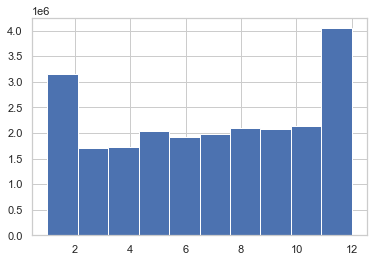

In [18]:
data['FEC_EVENT'].dt.month.hist()

In [19]:
def add_schedule_weekday(data):
    data['weekday'] = data['FEC_EVENT'].dt.weekday
    data['hour'] = data['FEC_EVENT'].dt.hour
    data['day'] = data['FEC_EVENT'].dt.day
    data['schedule'] = data['hour'].apply(get_schedule)
    data['tipo_dias'] = data['day'].apply(get_day_cut)
    data['month'] = data['FEC_EVENT'].dt.month
    data['trimestre'] = data['month'].apply(get_trimestre)

    for col in ['hour', 'day', 'month']:
        if col in data.columns:
            del data[col]
    
    return data

In [20]:
data = add_schedule_weekday(data)
data.columns

Index(['FEC_EVENT', 'PAGE', 'CONTENT_CATEGORY', 'CONTENT_CATEGORY_TOP',
       'CONTENT_CATEGORY_BOTTOM', 'SITE_ID', 'ON_SITE_SEARCH_TERM', 'USER_ID',
       'weekday', 'schedule', 'tipo_dias', 'trimestre'],
      dtype='object')

In [21]:
data = data.sort_values(by=['FEC_EVENT'], ascending=True)
data.head()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID,weekday,schedule,tipo_dias,trimestre
3104096,2018-01-01 00:09:17,2,2,2,2,2,1,7237,0,madrugada,inicio_mes,1
2084473,2018-01-01 00:14:17,2,2,2,2,2,1,4913,0,madrugada,inicio_mes,1
2084474,2018-01-01 00:14:18,2,2,2,2,2,1,4913,0,madrugada,inicio_mes,1
2084475,2018-01-01 00:14:26,3,2,2,2,3,1,4913,0,madrugada,inicio_mes,1
2084476,2018-01-01 00:14:32,20,2,2,2,3,1,4913,0,madrugada,inicio_mes,1


In [22]:
data.tail()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID,weekday,schedule,tipo_dias,trimestre
12925825,2018-12-31 23:58:55,39,2,2,2,3,1,6721,0,luego_del_trabajo,18_24,4
13616247,2018-12-31 23:59:35,2,2,2,2,2,1,8452,0,luego_del_trabajo,18_24,4
13616248,2018-12-31 23:59:40,3,2,2,2,3,1,8452,0,luego_del_trabajo,18_24,4
13616249,2018-12-31 23:59:50,69,2,2,2,3,1,8452,0,luego_del_trabajo,18_24,4
13616250,2018-12-31 23:59:59,141,2,2,2,3,1,8452,0,luego_del_trabajo,18_24,4


In [23]:
data.dtypes

FEC_EVENT                  datetime64[ns]
PAGE                               object
CONTENT_CATEGORY                   object
CONTENT_CATEGORY_TOP               object
CONTENT_CATEGORY_BOTTOM            object
SITE_ID                            object
ON_SITE_SEARCH_TERM                object
USER_ID                            object
weekday                             int64
schedule                           object
tipo_dias                          object
trimestre                           int64
dtype: object

In [24]:
def add_previous(userx):
    historia = 2
    
    data_userx = data[data[col_user] == userx].reset_index(drop=True)
    shape_data = data_userx.shape[0]
    
    data_userx['PAGE_PREVIOUS'] = data_userx['PAGE'].shift(1).fillna('none')
    #data_userx['PAGE_PRE_PREVIOUS'] = data_userx['PAGE'].shift(2).fillna('none')
    
    #data_userx = data_userx.drop([0, 1],axis=0)
    #data_userx['PAGE'] =  data_userx['PAGE_PRE_PREVIOUS'].astype(str) + '_' + data_userx['PAGE_PREVIOUS'].astype(str) + '_' + data_userx['PAGE'].astype(str)
    data_userx['PAGE'] =  data_userx['PAGE_PREVIOUS'].astype(str) + '_' + data_userx['PAGE'].astype(str)
    del data_userx['PAGE_PREVIOUS']
    #del data_userx['PAGE_PRE_PREVIOUS']
    
    print(userx, end=' ')     
    return data_userx

In [25]:
usuarios = list(data[col_user].unique())
print(len(usuarios))

11676


In [26]:
#ventana = 100

#for posicion in range(ventana, len(usuarios) + ventana, ventana):
#    print(posicion-ventana, posicion)   

In [27]:
%%time
from multiprocessing.dummy import Pool as ThreadPool

new_data = []
ventana = 500

for posicion in range(ventana, len(usuarios) + ventana, ventana):
    
    recolector = []
    pool = ThreadPool(10)     
    for respon in pool.map(
                     add_previous, 
                     usuarios[posicion-ventana:posicion]):
        recolector.append(respon)
    
    pool.close() 
    pool.join()
    
    new_data.extend(recolector)
    print('recolector: ', len(new_data))

7237 10901 8939 65718836  5269 7771 19559975 4913  10164 10302 10471 8799 4269 9796 6632 801 7160 8953 7414444  7539 492 2268 6335 7615 9428 2587 362 354 717 4081 4682 3720 2677 136847198526 5046   5648 3361 2604 221 3566 67 2410927 9686 10652 2771  7036 5170 2067403  113 216 8514 5006 8730 553 7387 3261 2033 7591 9468 7195 27063053 9344  3081 6061 9523 106119293  32747988 7584  6192 9935915 2644  8701 9276 3256258  7119 2945 8178 7700 4970151110029  98441247  2786  2178 10666 92574018  10502 8082 9169 3015 3038 956 88875695  5165 6150 2433 67711975  8288 2351 6056 9092 10855 4191 3424 76265751 6347 6120  80694654 8612  1108 3044 60986774  84326193 3888  6251 4275 6511 3886 2107 7325 10314 6199 7956 10008 4165 7873 6477 1264 8682 3699 3087 5853 2840 20932826 2360 6722  7139 3165 6893 10732 3098 5247 103922497  9972 6956 6614 87126703  3 5878 141 4241 10790 1936 9284389 10281 10712 3514  10364 0 68616394 16611709   6990 6086 9543 24176702  796 7383 99410472  4348 3293 8961 145 10607 924

In [28]:
data = pd.concat(new_data, axis=0)
del new_data
print(data.shape)
gc.collect()

(22870354, 12)


0

In [29]:
(data['CONTENT_CATEGORY'] == data['CONTENT_CATEGORY_BOTTOM']).all()

True

In [30]:
del data['CONTENT_CATEGORY_BOTTOM']

In [31]:
data['CONTENT_CATEGORY'] =  data['CONTENT_CATEGORY'] + '_' + data['CONTENT_CATEGORY_TOP']
data['CONTENT_CATEGORY'].head()

0    2_2
1    1_1
2    9_4
3    2_2
4    2_2
Name: CONTENT_CATEGORY, dtype: object

In [32]:
del data['CONTENT_CATEGORY_TOP']

In [33]:
data = data.sort_values(by=['FEC_EVENT'], ascending=True)
data.head()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID,weekday,schedule,tipo_dias,trimestre
0,2018-01-01 00:09:17,none_2,2_2,2,1,7237,0,madrugada,inicio_mes,1
0,2018-01-01 00:14:17,none_2,2_2,2,1,4913,0,madrugada,inicio_mes,1
1,2018-01-01 00:14:18,2_2,2_2,2,1,4913,0,madrugada,inicio_mes,1
2,2018-01-01 00:14:26,2_3,2_2,3,1,4913,0,madrugada,inicio_mes,1
3,2018-01-01 00:14:32,3_20,2_2,3,1,4913,0,madrugada,inicio_mes,1


In [34]:
data.tail()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID,weekday,schedule,tipo_dias,trimestre
2698,2018-12-31 23:58:55,57_39,2_2,3,1,6721,0,luego_del_trabajo,18_24,4
9453,2018-12-31 23:59:35,5_2,2_2,2,1,8452,0,luego_del_trabajo,18_24,4
9454,2018-12-31 23:59:40,2_3,2_2,3,1,8452,0,luego_del_trabajo,18_24,4
9455,2018-12-31 23:59:50,3_69,2_2,3,1,8452,0,luego_del_trabajo,18_24,4
9456,2018-12-31 23:59:59,69_141,2_2,3,1,8452,0,luego_del_trabajo,18_24,4


In [35]:
count = data['PAGE'].value_counts()
count

2_3        2198917
2_2         692878
3_2         609674
40_2        544159
5_2         513825
            ...   
48_72            1
454_21           1
3_1210           1
21_321           1
106_267          1
Name: PAGE, Length: 49150, dtype: int64

In [41]:
#help(data['weekday'].plot)

In [ ]:
data['weekday'].plot(kind='bar')

In [36]:
count[count <= 2]

838_155    2
3_656      2
25_1464    2
300_369    2
7_505      2
          ..
48_72      1
454_21     1
3_1210     1
21_321     1
106_267    1
Name: PAGE, Length: 27386, dtype: int64

In [37]:
data.to_csv('data/pageview_with_previous_2.csv', index=False)

In [ ]:
"""
Only 3 hiatorical:   11084
Only 3 hiatorical:   11317
Only 2 hiatorical:   11445
Only 3 hiatorical:   11538
Only 2 hiatorical:   11674

"""